In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
df = pd.read_parquet("./../../../resulting data/verses_features.parquet")

In [3]:
df.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.columns.tolist()[0:10]

['bible_identifier',
 'bible_book',
 'bible_chapter',
 'bible_book_chapter',
 'genre',
 'twitter_freq_sum_2014_2015',
 'twitter_freq_2014',
 'twitter_freq_2015',
 'relations',
 'monogamy']

In [7]:
structural_features = df.columns.tolist()[265:297]


In [8]:
sexual_features = df.columns.tolist()[8:262]

In [9]:
entities_features = df.columns.tolist()[262:265] + df.columns.tolist()[298:1000]

In [10]:
df.describe()

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
count,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.0,31065.000000,...,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000
mean,2286.298793,1366.727797,919.570996,0.000225,0.000193,0.000515,0.001610,0.000064,0.0,0.000032,...,0.000418,0.000064,0.000032,0.000032,0.000064,0.000097,0.000032,0.000869,0.000129,0.000032
std,12282.503644,8274.810650,4428.844891,0.015010,0.013896,0.022689,0.040087,0.008024,0.0,0.005674,...,0.030551,0.008024,0.005674,0.005674,0.011347,0.017021,0.005674,0.034501,0.022695,0.005674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,32.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,115.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,941.000000,507.000000,415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,875311.000000,613161.000000,262150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000


In [11]:
books_df = df.groupby("bible_book").sum()

In [12]:
books_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
bible_book,,,,,,,,,,,,,,,,,,,,,
1CH,244312,123407,120905,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1CO,2658801,1637393,1021408,7,0,0,16,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1JO,1595001,1043423,551578,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1KI,225574,118378,107196,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1PE,1325301,853718,471583,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUT,27430,11254,16176,0,2,0,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SON,68811,35096,33715,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TIT,172005,107460,64545,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
books_df["number of verses"] = df.groupby("bible_book").count().iloc[:,0].values.tolist()


In [14]:
books_df = books_df.loc[df["bible_book"].unique()]


In [15]:
books_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,number of verses
bible_book,,,,,,,,,,,,,,,,,,,,,
GEN,938570,467676,470894,0,1,10,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1533
EXO,532548,256961,275587,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1213
LEV,206505,91530,114975,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,859
NUM,191596,95279,96317,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1288
DEU,568536,335272,233264,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1JO,1595001,1043423,551578,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105
2JO,23028,14143,8885,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
3JO,48185,27678,20507,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14


In [16]:
rel_books_df = books_df.div(books_df["number of verses"], axis="index")

In [17]:
rel_books_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,number of verses
bible_book,,,,,,,,,,,,,,,,,,,,,
GEN,612.243966,305.072407,307.171559,0.0,0.000652,0.006523,0.011742,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
EXO,439.033800,211.839242,227.194559,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
LEV,240.401630,106.554133,133.847497,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
NUM,148.754658,73.974379,74.780280,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
DEU,592.842544,349.605839,243.236705,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1JO,15190.485714,9937.361905,5253.123810,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2JO,1771.384615,1087.923077,683.461538,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3JO,3441.785714,1977.000000,1464.785714,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [18]:
entities_df = pd.read_excel("./../../../entities.xls")


In [19]:
entities_df.index = entities_df["id"]


# Visualizations

In [20]:
rel_books_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,number of verses
bible_book,,,,,,,,,,,,,,,,,,,,,
GEN,612.243966,305.072407,307.171559,0.0,0.000652,0.006523,0.011742,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
EXO,439.033800,211.839242,227.194559,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
LEV,240.401630,106.554133,133.847497,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
NUM,148.754658,73.974379,74.780280,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
DEU,592.842544,349.605839,243.236705,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1JO,15190.485714,9937.361905,5253.123810,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2JO,1771.384615,1087.923077,683.461538,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3JO,3441.785714,1977.000000,1464.785714,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


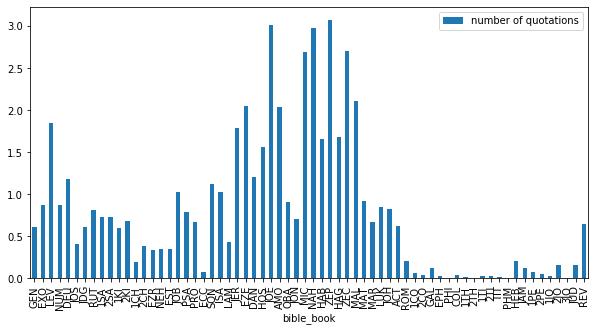

In [21]:
rel_books_df.plot(kind="bar", y=['number of quotations'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A15FDBB88>,
      dtype=object)

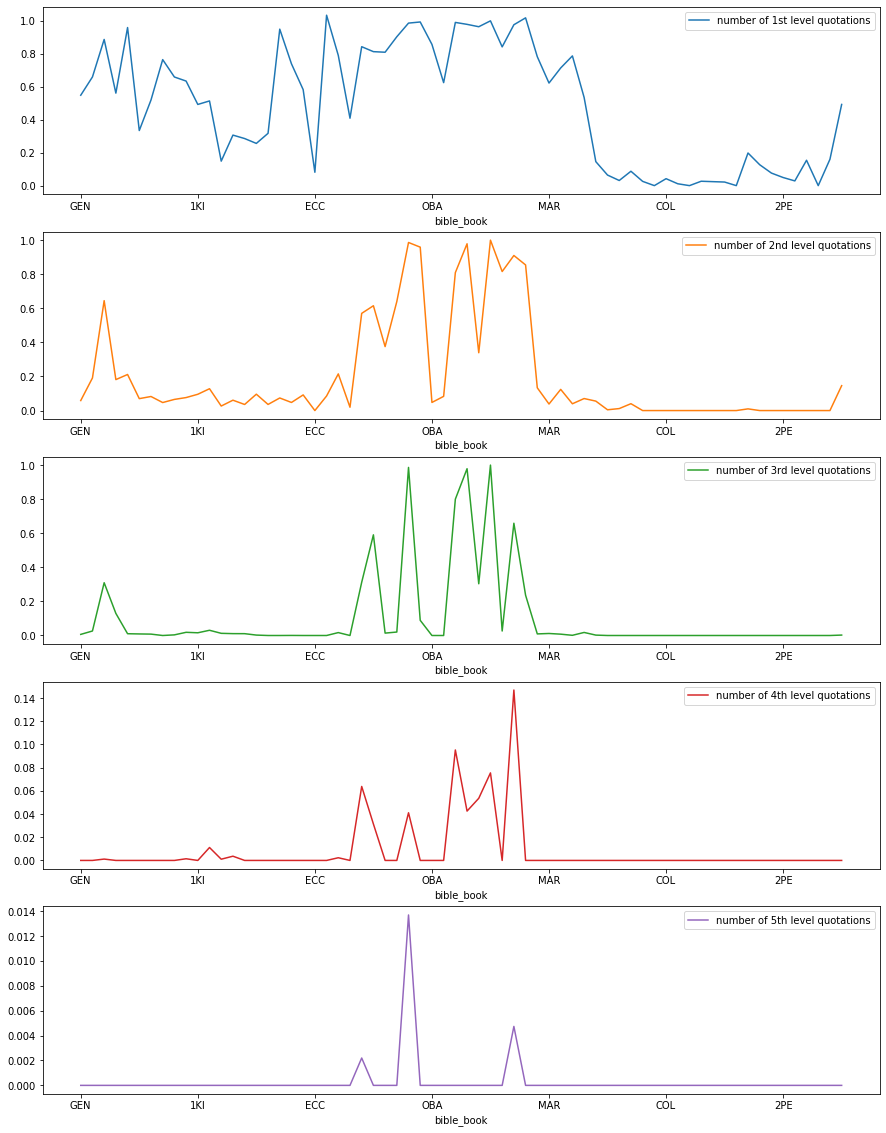

In [22]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,20))

#quantitative_data.plot(kind="bar", x ="id", y = 'number verses', rot=90, figsize=(15,10), ax=axes[0])
#quantitative_data.plot(kind="bar", x ="id", y = 'number chapters', rot=90, figsize=(15,10), ax=axes[1])

rel_books_df.plot(kind="line", y=['number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations'], subplots=True, ax=axes)



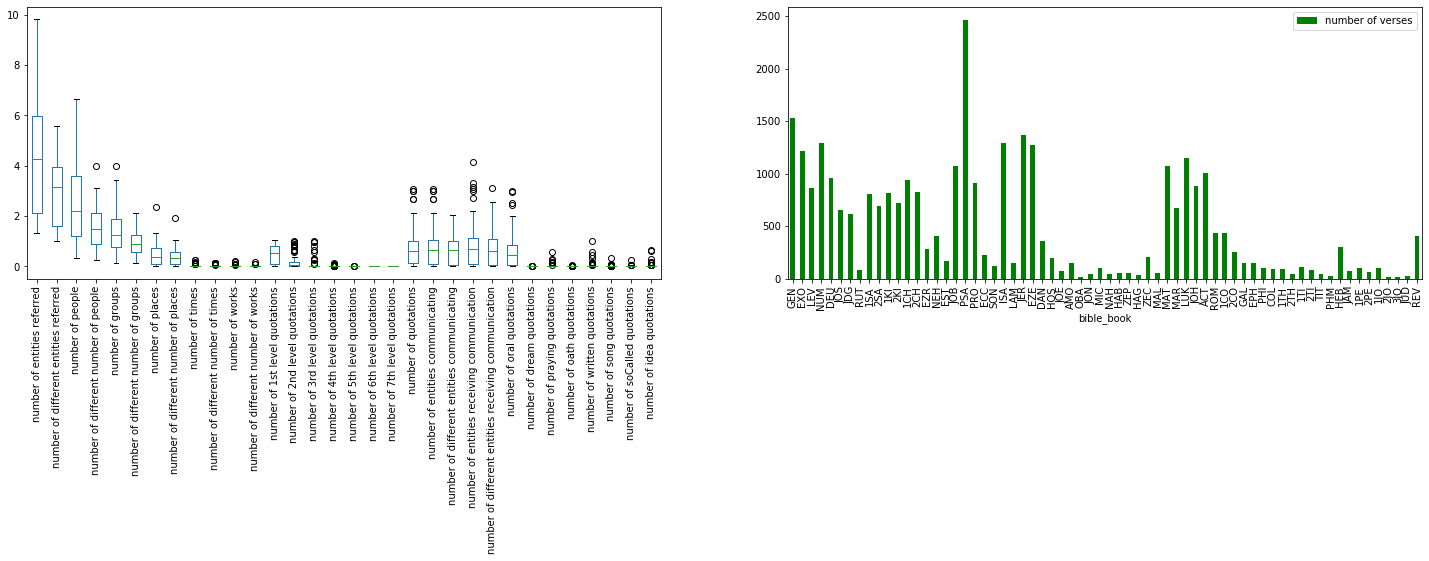

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,5))

rel_books_df[structural_features].plot.box(rot=90, ax=axes[0])
books_df.plot(kind="bar", y="number of verses", color="green", ax=axes[1])

#fig.savefig("./fig.png")

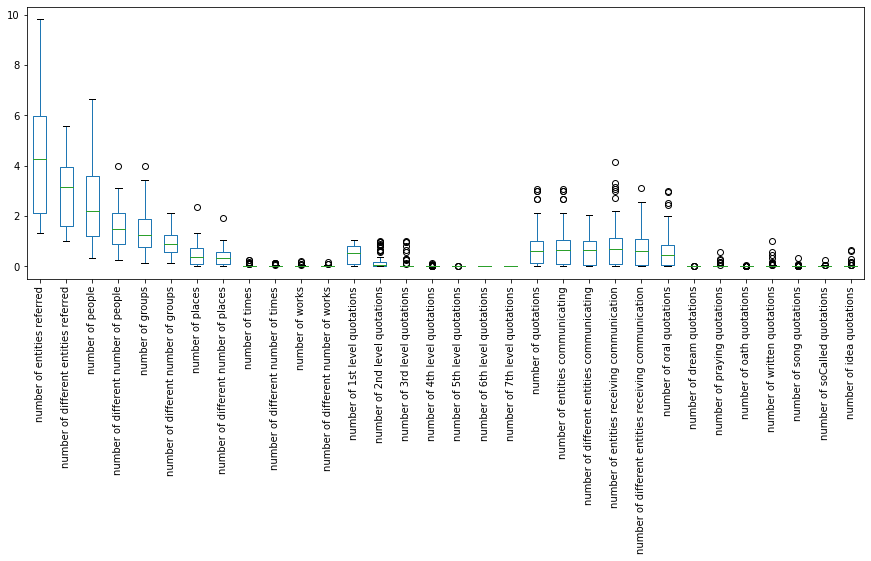

In [24]:
rel_books_df[structural_features].plot.box(rot=90, figsize=(15,5))


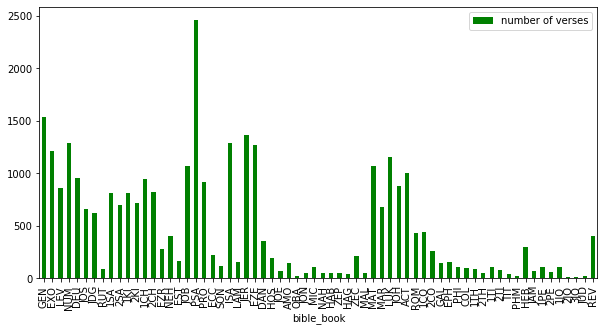

In [25]:
books_df.plot(kind="bar", y="number of verses", color="green",figsize=(10,5))

In [26]:
structural_features

['number of entities referred',
 'number of different entities referred',
 'number of people',
 'number of different number of people',
 'number of groups',
 'number of different number of groups',
 'number of places',
 'number of different number of places',
 'number of times',
 'number of different number of times',
 'number of works',
 'number of different number of works',
 'number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations',
 'number of 6th level quotations',
 'number of 7th level quotations',
 'number of quotations',
 'number of entities communicating',
 'number of different entities communicating',
 'number of entities receiving communication',
 'number of different entities receiving communication',
 'number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'num

In [27]:
rel_books_df[["number of people","number of groups", "number of places"]]

,number of people,number of groups,number of places
bible_book,,,
GEN,3.680365,0.685584,0.523810
EXO,2.701566,1.160758,0.436933
LEV,3.753201,1.882421,0.350407
NUM,2.781832,2.087733,0.623447
DEU,2.349322,2.440042,0.759124
...,...,...,...
1JO,1.561905,0.752381,0.019048
2JO,1.153846,1.000000,0.000000
3JO,0.785714,0.714286,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

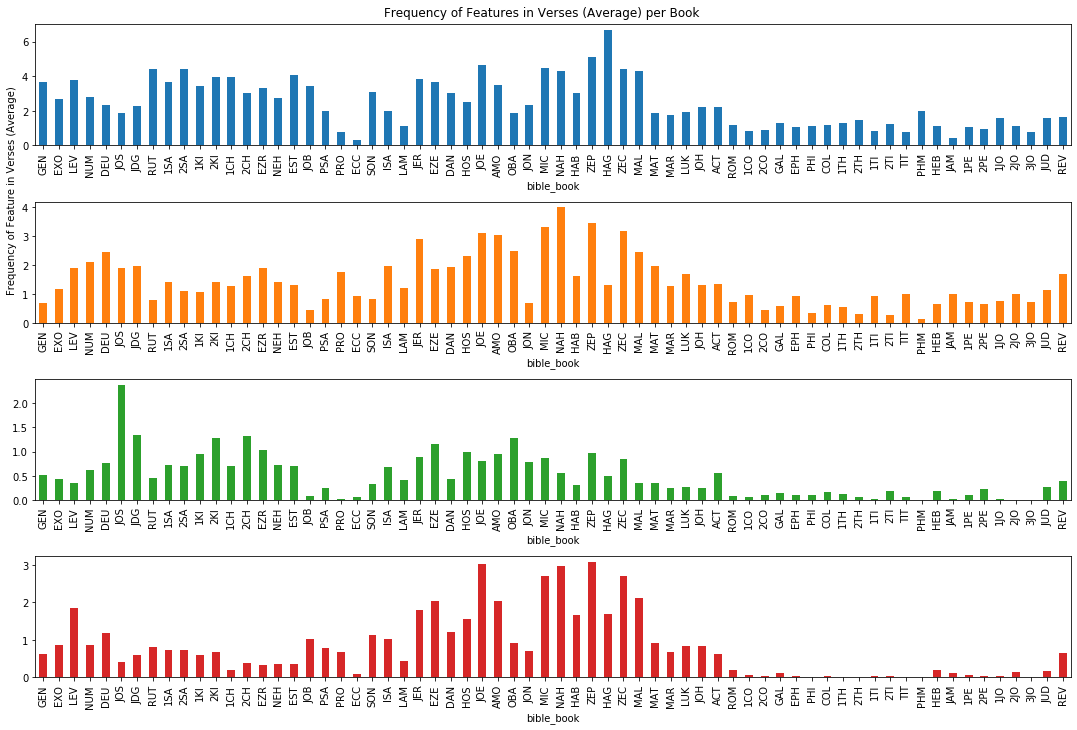

In [82]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

rel_books_df.plot(kind = "bar", y = ["number of people","number of groups", "number of places", "number of quotations"], ax = axes, subplots = True,  legend=False, title = ["", "", "", ""])

#rel_books_df.plot(kind="bar", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes)
#relative_quantitative_data.plot(kind="bar", x="id", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes[1])
#fig.set_title

#axes.set_ylabel('yA')

fig.suptitle('Frequency of Features in Verses per Book (Average)', y = 1.01)
#fig.subplots_adjust(hspace=0.5, left=0.5)
fig.text(0.01, 0.9, "Frequency of Feature in Verses (Average)", ha="center", va="top", rotation=90)

axes.set_ylabel("Life expectancy at birth")

#axes.set_xticks(relative_quantitative_data.order.tolist(), relative_quantitative_data.id.tolist())

#axes[1].title.set_text('First Plot')

#axes[1].set_title = "Number of different entities in each book of the Bible (relative to number of verses)"



plt.subplots_adjust(top = 0.9, left = 0.05, bottom = 0.15)  

plt.tight_layout()

fig.savefig("./../../../visualizations/features/bar_people_groups_places_quotations_bible.png", bbox_inches="tight")
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

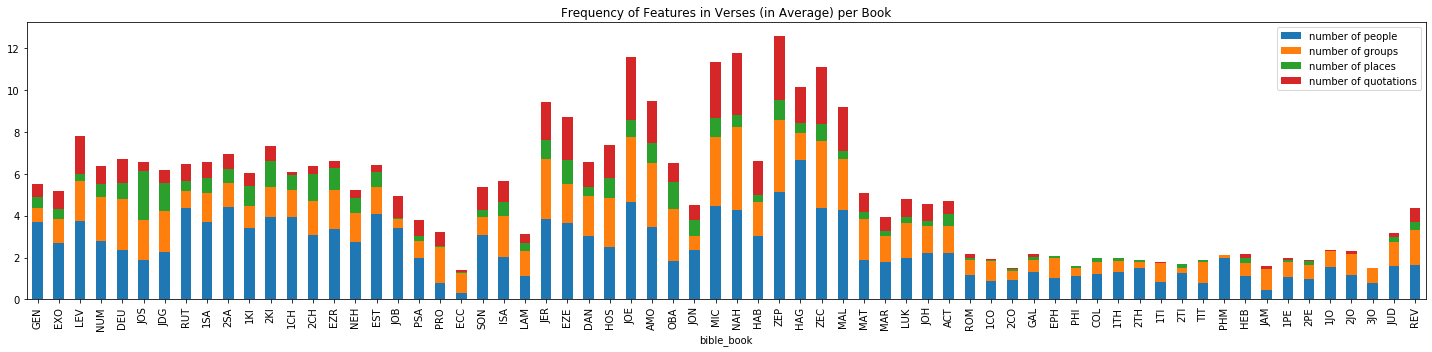

In [83]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

rel_books_df.plot(kind="bar", y=["number of people","number of groups", "number of places", "number of quotations"], figsize=(20,5), ax=axes, stacked=True)

#rel_books_df.plot(kind="bar", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes)
#relative_quantitative_data.plot(kind="bar", x="id", y=["number of different people","number of different groups", "number of different places"], stacked=True, ax = axes[1])
#fig.set_title

axes.title.set_text('Frequency of Features in Verses (in Average) per Book')
#axes.set_xticks(relative_quantitative_data.order.tolist(), relative_quantitative_data.id.tolist())

#axes[1].title.set_text('First Plot')

#axes[1].set_title = "Number of different entities in each book of the Bible (relative to number of verses)"
plt.tight_layout()

#fig.savefig("./fig.png")
fig.savefig("./../../../visualizations/features/stacked_bar_people_groups_places_quotations_bible.png")
plt.show



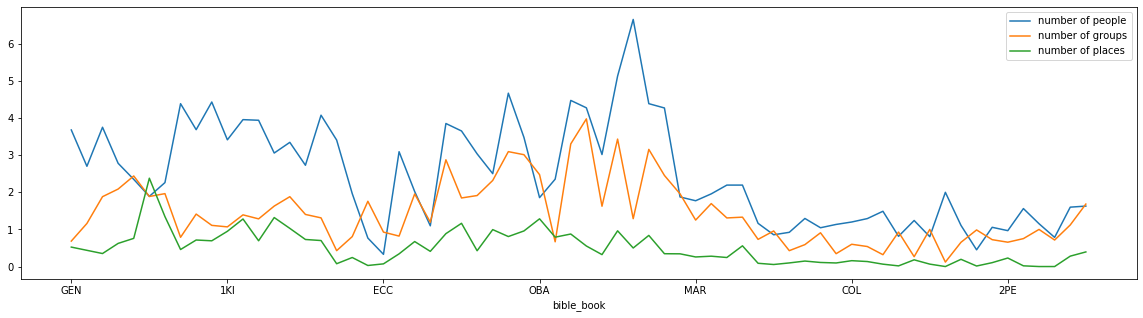

In [84]:
rel_books_df.plot(kind="line",  y=["number of people","number of groups", "number of places"], figsize=(20,5))

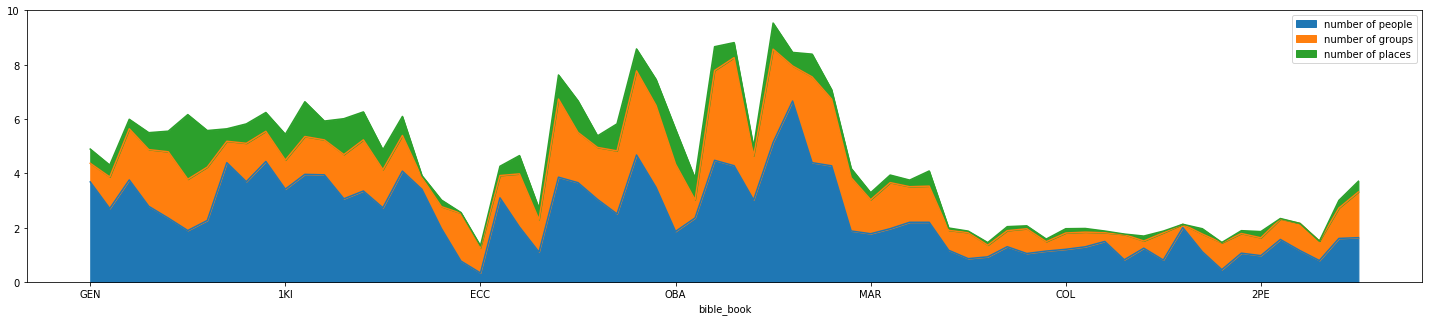

In [85]:
rel_books_df.plot(kind="area", y=["number of people","number of groups", "number of places"], figsize=(25,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A19788308>],
      dtype=object)

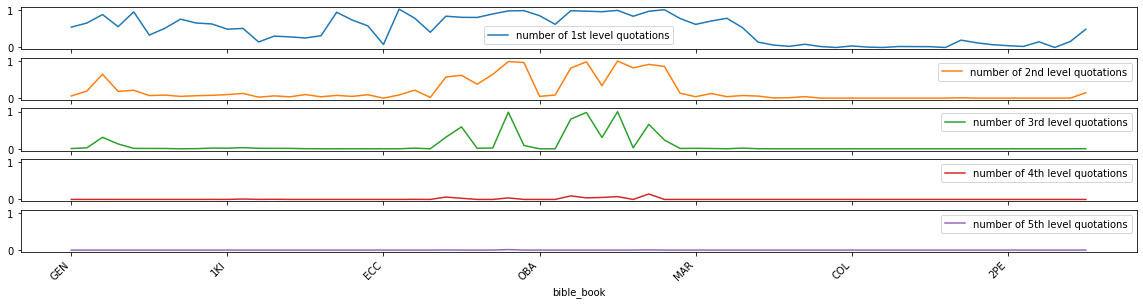

In [86]:
rel_books_df.plot(kind="line", y=['number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations'], figsize=(20,5), rot=45, subplots=True, sharey = True, layout = (5, 1), x_compat=True)
#plt.xticks(relative_quantitative_data["id"].tolist())

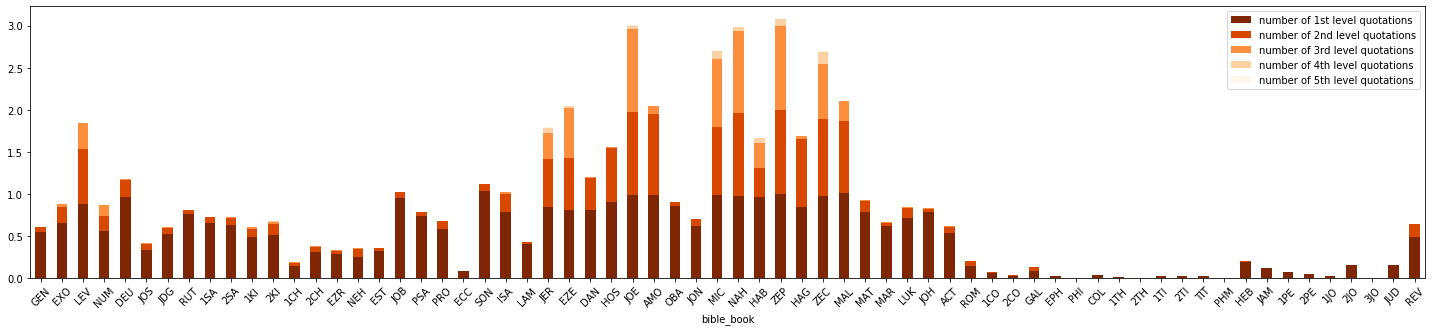

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

#axes.set_xticks(relative_quantitative_data.order.tolist(), relative_quantitative_data.id.tolist())

rel_books_df.plot(kind="bar", y=['number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations'], stacked = True, figsize=(25,5), cmap="Oranges_r", rot=45, ax = axes)
#plt.xticks(relative_quantitative_data["id"].tolist())
#axes.tick_params(axis='x', which='minor', bottom=True)
#axes.tick_params(axis='x', which='major', bottom=True)

fig.savefig("./../../../visualizations/features/stacked_bars_levels_quotations_bible.png")



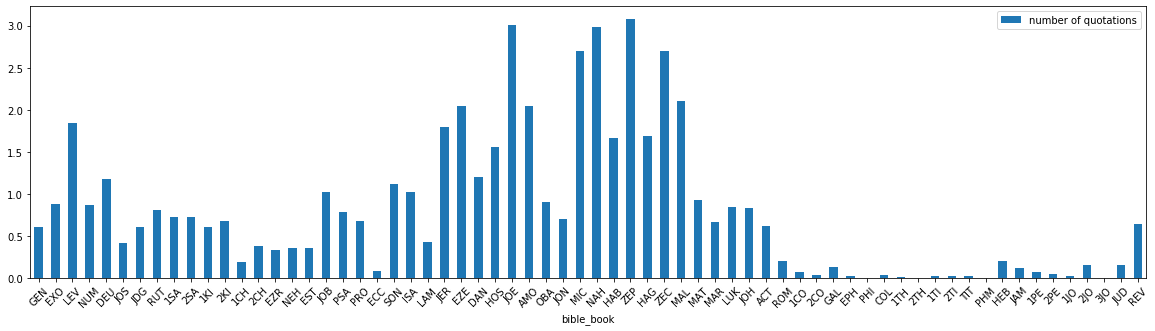

In [88]:
rel_books_df.plot(kind="bar", y=['number of quotations'], figsize=(20,5), rot=45)
#plt.xticks(relative_quantitative_data["id"].tolist())
plt.savefig("./../../../visualizations/features/bars_quotations.png")


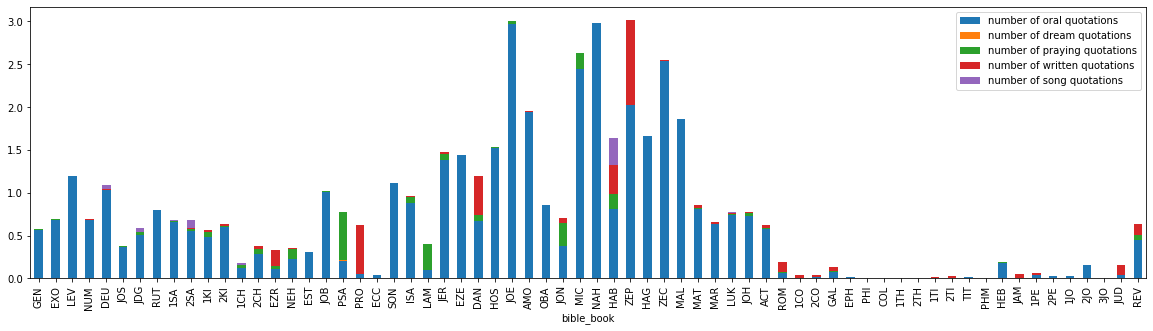

In [89]:
rel_books_df.plot(kind="bar",  y=['number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of written quotations',
 'number of song quotations'
 ], stacked=True, figsize=(20,5))

plt.savefig("./../../../visualizations/features/stacked_bars_types_quotations_selected.png")


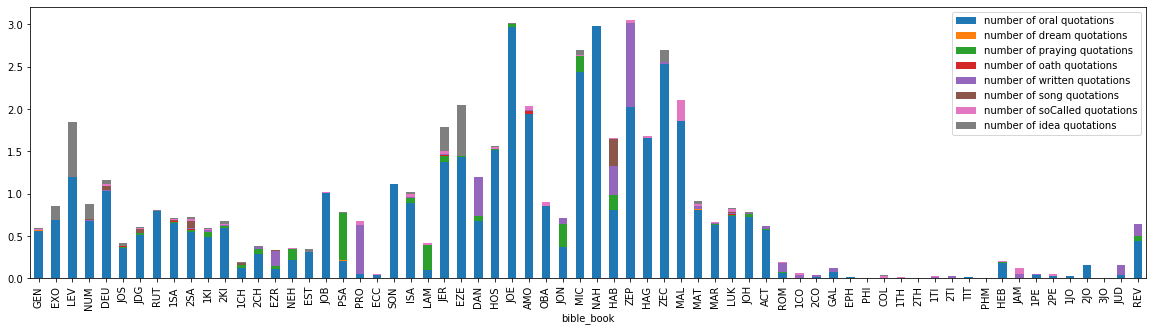

In [90]:
rel_books_df.plot(kind="bar", y=['number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'number of song quotations',
 'number of soCalled quotations',
 'number of idea quotations'], stacked=True, figsize=(20,5))

plt.savefig("./../../../visualizations/features/stacked_bars_types_quotations.png")


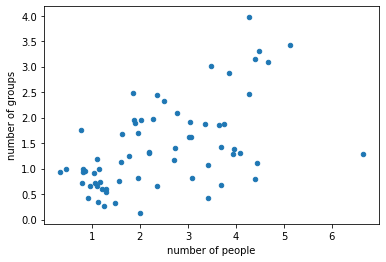

In [91]:
rel_books_df.plot.scatter(x="number of people",y="number of groups")

In [92]:
structural_features

['number of entities referred',
 'number of different entities referred',
 'number of people',
 'number of different number of people',
 'number of groups',
 'number of different number of groups',
 'number of places',
 'number of different number of places',
 'number of times',
 'number of different number of times',
 'number of works',
 'number of different number of works',
 'number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations',
 'number of 6th level quotations',
 'number of 7th level quotations',
 'number of quotations',
 'number of entities communicating',
 'number of different entities communicating',
 'number of entities receiving communication',
 'number of different entities receiving communication',
 'number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'num

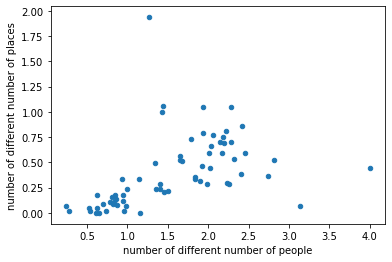

In [93]:
rel_books_df.plot.scatter(x="number of different number of people",y="number of different number of places")

In [94]:
import seaborn as sb

In [95]:
rel_books_df.loc["MAT"][structural_features].sort_values(ascending=False)

number of entities referred                             4.240896
number of different entities referred                   3.295051
number of groups                                        1.958917
number of people                                        1.874883
number of different number of groups                    1.543417
number of different number of people                    1.401494
number of entities receiving communication              1.118581
number of different entities receiving communication    1.090570
number of entities communicating                        0.935574
number of quotations                                    0.925303
number of different entities communicating              0.909430
number of oral quotations                               0.809524
number of 1st level quotations                          0.782446
number of places                                        0.342670
number of different number of places                    0.288515
number of 2nd level quota

In [96]:
rel_books_df.loc["MAT"][sexual_features].sort_values(ascending=False)[0:13].index.tolist()

['virginity',
 'condemned-aspect',
 'wedding',
 'marriage',
 'sexual-desire',
 'body',
 'engaged',
 'widow',
 'divorce',
 'marital-relation-political-family',
 'sex-outside-marriage',
 'poligamy',
 'birth']

In [97]:
rel_books_df.loc["MAT"][entities_features].sort_values(ascending=False)[0:20].index.tolist()

['#per1',
 '#org0',
 '#per14',
 '#org18',
 '#org12',
 '#org19',
 '#org15',
 '#org25',
 '#pla18',
 '#org4',
 '#org8',
 '#org122',
 '#org183',
 '#per20',
 '#org13',
 '#org100',
 '#pla30',
 '#org24',
 '#pla41',
 '#per35']

In [98]:
most_frequent_sexual_topics = rel_books_df.loc["MAT"][sexual_features].sort_values(ascending=False)[0:13].index.tolist()
most_frequent_sexual_topics

['virginity',
 'condemned-aspect',
 'wedding',
 'marriage',
 'sexual-desire',
 'body',
 'engaged',
 'widow',
 'divorce',
 'marital-relation-political-family',
 'sex-outside-marriage',
 'poligamy',
 'birth']

In [117]:
most_frequent_entities = [entity for entity in rel_books_df.loc["MAT"][entities_features].sort_values(ascending=False)[0:100].index.tolist() if ("org" in entity or "per" in entity ) and "per0" not in entity ]
most_frequent_entities[0:10]

['#per1',
 '#org0',
 '#per14',
 '#org18',
 '#org12',
 '#org19',
 '#org15',
 '#org25',
 '#org4',
 '#org8']

In [118]:
df

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31060,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31061,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31062,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31063,b.REV.022.020,REV,022,REV.022,apocalyptic,11981,6014,5967,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df.loc[df["bible_book"] == "MAT"][most_frequent_sexual_topics + most_frequent_entities].fillna(0)

,virginity,condemned-aspect,wedding,marriage,sexual-desire,body,engaged,widow,divorce,marital-relation-political-family,...,#per421,#per142,#per338,#per310,#per306,#per272,#per453,#org81,#org85,#per170
23145,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23146,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23147,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23148,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23149,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24212,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24213,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24214,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
coappereance_df = pd.DataFrame(index = most_frequent_sexual_topics, columns = most_frequent_entities)
for theme in most_frequent_sexual_topics:
    for entity in most_frequent_entities:
        try:
            coappereance_df.loc[theme, entity] = (len(df.loc[(df["bible_book"] == "MAT") & (df[theme] > 0) & (df[entity] > 0) ].fillna(0)) / len(df.loc[(df["bible_book"] == "MAT") & (df[entity] > 0) ].fillna(0)) )
        except:
            coappereance_df.loc[theme, entity] = 0


In [122]:
coappereance_df * 100

,#per1,#org0,#per14,#org18,#org12,#org19,#org15,#org25,#org4,#org8,...,#per421,#per142,#per338,#per310,#per306,#per272,#per453,#org81,#org85,#per170
virginity,1.66074,1.24378,0.578035,5.6338,0,9.43396,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
condemned-aspect,1.30486,2.48756,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wedding,1.18624,1.99005,3.46821,7.04225,0,1.88679,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
marriage,1.06762,0.497512,0.578035,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
sexual-desire,1.06762,1.74129,1.15607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
body,1.06762,1.99005,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
engaged,0.948992,0.746269,0,1.40845,0,3.77358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
widow,0.830368,0.746269,0.578035,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
divorce,0.830368,0.746269,0.578035,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
marital-relation-political-family,0.711744,0.497512,0.578035,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
coappereance_df = coappereance_df[coappereance_df.sum().sort_values(ascending=False).index.tolist()]

In [124]:
coappereance_df = coappereance_df.loc[coappereance_df.sum(axis="columns").sort_values(ascending=False).index.tolist()]

In [125]:
coappereance_df

,#org183,#org122,#per26,#per47,#org19,#org4,#org0,#org18,#per1,#org102,...,#org43,#org150,#per32,#per16,#org48,#per78,#org85,#per7,#org21,#per170
marriage,0.3125,0.263158,0.142857,0,0,0.04,0.00497512,0,0.0106762,0,...,0,0,0,0,0,0,0,0,0,0
widow,0.25,0.157895,0.142857,0,0,0.04,0.00746269,0,0.00830368,0.125,...,0,0,0,0,0,0,0,0,0,0
wedding,0,0,0,0.5,0.0188679,0,0.0199005,0.0704225,0.0118624,0,...,0,0,0,0,0,0,0,0,0,0
divorce,0.125,0.210526,0.285714,0,0,0,0.00746269,0,0.00830368,0,...,0,0,0,0,0,0,0,0,0,0
marital-relation-political-family,0.25,0.157895,0.142857,0,0,0.04,0.00497512,0,0.00711744,0,...,0,0,0,0,0,0,0,0,0,0
virginity,0,0,0,0,0.0943396,0,0.0124378,0.056338,0.0166074,0,...,0,0,0,0,0,0,0,0,0,0
birth,0,0.105263,0,0,0,0.04,0.00497512,0,0.0059312,0,...,0,0,0,0,0,0,0,0,0,0
sexual-desire,0.0625,0.0526316,0,0,0,0,0.0174129,0,0.0106762,0,...,0,0,0,0,0,0,0,0,0,0
sex-outside-marriage,0,0.0526316,0,0,0,0,0.00746269,0,0.00711744,0,...,0,0,0,0,0,0,0,0,0,0
engaged,0,0,0,0,0.0377358,0,0.00746269,0.0140845,0.00948992,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
coappereance_df.sum(axis="columns").sort_values()

poligamy                             0.029774
body                                 0.030577
condemned-aspect                     0.037924
engaged                              0.068773
sex-outside-marriage                 0.119843
sexual-desire                        0.154781
birth                                0.201950
virginity                            0.225503
marital-relation-political-family    0.608625
divorce                              0.642787
wedding                              0.655735
widow                                0.737299
marriage                             0.779947
dtype: float64

In [127]:
coappereance_df.sum().sort_values(ascending=False)

#org183    1.000000
#org122    1.000000
#per26     0.714286
#per47     0.500000
#org19     0.169811
             ...   
#org84     0.000000
#per323    0.000000
#per136    0.000000
#per268    0.000000
#per272    0.000000
Length: 71, dtype: float64

In [128]:
entities_df.columns.tolist()

['order',
 'id',
 'NormalizedName-sp',
 'aclaration',
 'variants',
 'comments',
 'book',
 'cert',
 'wikidata id',
 'cert_wikidata',
 'accuracy_wiki',
 'Gender',
 'NormalizedName-en',
 'NormalizedName-ge',
 'NormalizedName-po',
 'type',
 'nature',
 'definition',
 'importance',
 'order-edition',
 'latitude',
 'longitude',
 'geo_cert',
 'geo_controlled',
 'sum_freq',
 'median_freq',
 'mean_freq',
 'std_freq',
 'GEN',
 'EXO',
 'LEV',
 'NUM',
 'DEU',
 'JOS',
 'JDG',
 'RUT',
 '1SA',
 '2SA',
 '1KI',
 '2KI',
 '1CH',
 '2CH',
 'EZR',
 'NEH',
 'EST',
 'JOB',
 'PSA',
 'PRO',
 'ECC',
 'SON',
 'ISA',
 'LAM',
 'JER',
 'EZE',
 'DAN',
 'HOS',
 'JOE',
 'AMO',
 'OBA',
 'JON',
 'MIC',
 'NAH',
 'HAB',
 'ZEP',
 'HAG',
 'ZEC',
 'MAL',
 'MAT',
 'MAR',
 'LUK',
 'JOH',
 'ACT',
 'ROM',
 '1CO',
 '2CO',
 'GAL',
 'EPH',
 'PHI',
 'COL',
 '1TH',
 '2TH',
 '1TI',
 '2TI',
 'TIT',
 'PHM',
 'HEB',
 'JAM',
 '1PE',
 '2PE',
 '1JO',
 '2JO',
 '3JO',
 'JUD',
 'REV']

In [129]:
#entities_df["NormalizedName-sp"].to_dict()

In [130]:

coappereance_df.iloc[:,0:20]

,#org183,#org122,#per26,#per47,#org19,#org4,#org0,#org18,#per1,#org102,#per14,#org8,#org100,#per35,#org39,#org101,#per13,#org70,#per142,#per2
marriage,0.3125,0.263158,0.142857,0,0,0.04,0.00497512,0,0.0106762,0,0.00578035,0,0,0,0,0,0,0,0,0
widow,0.25,0.157895,0.142857,0,0,0.04,0.00746269,0,0.00830368,0.125,0.00578035,0,0,0,0,0,0,0,0,0
wedding,0,0,0,0.5,0.0188679,0,0.0199005,0.0704225,0.0118624,0,0.0346821,0,0,0,0,0,0,0,0,0
divorce,0.125,0.210526,0.285714,0,0,0,0.00746269,0,0.00830368,0,0.00578035,0,0,0,0,0,0,0,0,0
marital-relation-political-family,0.25,0.157895,0.142857,0,0,0.04,0.00497512,0,0.00711744,0,0.00578035,0,0,0,0,0,0,0,0,0
virginity,0,0,0,0,0.0943396,0,0.0124378,0.056338,0.0166074,0,0.00578035,0.04,0,0,0,0,0,0,0,0
birth,0,0.105263,0,0,0,0.04,0.00497512,0,0.0059312,0,0.00578035,0.04,0,0,0,0,0,0,0,0
sexual-desire,0.0625,0.0526316,0,0,0,0,0.0174129,0,0.0106762,0,0.0115607,0,0,0,0,0,0,0,0,0
sex-outside-marriage,0,0.0526316,0,0,0,0,0.00746269,0,0.00711744,0,0,0,0.0526316,0,0,0,0,0,0,0
engaged,0,0,0,0,0.0377358,0,0.00746269,0.0140845,0.00948992,0,0,0,0,0,0,0,0,0,0,0


In [131]:

coappereance_df.rename(entities_df["NormalizedName-en"].to_dict(), axis="columns").iloc[:,0:14]

,men,women,Moses,Noah,non-believers,angels,people,believers,Jesus,lower economic groups,God,prophets,kings and responsible in general,NaN
marriage,0.3125,0.263158,0.142857,0,0,0.04,0.00497512,0,0.0106762,0,0.00578035,0,0,0
widow,0.25,0.157895,0.142857,0,0,0.04,0.00746269,0,0.00830368,0.125,0.00578035,0,0,0
wedding,0,0,0,0.5,0.0188679,0,0.0199005,0.0704225,0.0118624,0,0.0346821,0,0,0
divorce,0.125,0.210526,0.285714,0,0,0,0.00746269,0,0.00830368,0,0.00578035,0,0,0
marital-relation-political-family,0.25,0.157895,0.142857,0,0,0.04,0.00497512,0,0.00711744,0,0.00578035,0,0,0
virginity,0,0,0,0,0.0943396,0,0.0124378,0.056338,0.0166074,0,0.00578035,0.04,0,0
birth,0,0.105263,0,0,0,0.04,0.00497512,0,0.0059312,0,0.00578035,0.04,0,0
sexual-desire,0.0625,0.0526316,0,0,0,0,0.0174129,0,0.0106762,0,0.0115607,0,0,0
sex-outside-marriage,0,0.0526316,0,0,0,0,0.00746269,0,0.00711744,0,0,0,0.0526316,0
engaged,0,0,0,0,0.0377358,0,0.00746269,0.0140845,0.00948992,0,0,0,0,0


In [132]:
import seaborn as sns

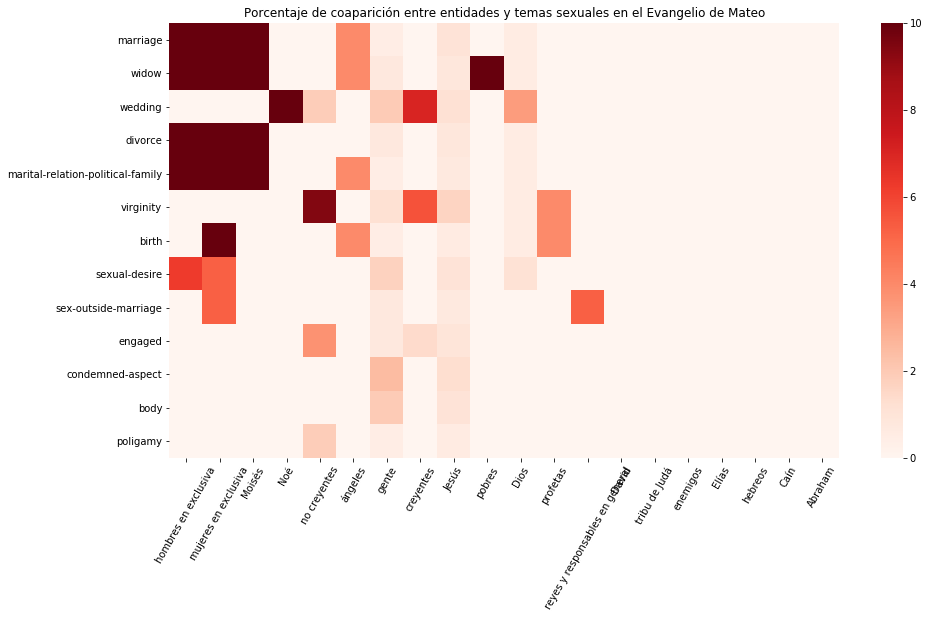

In [133]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.heatmap(coappereance_df.rename(entities_df["NormalizedName-sp"].to_dict(), axis="columns").iloc[:,0:20].fillna(0) * 100, vmin=0, vmax =10, cmap="Reds", ax=axes)
axes.title.set_text("Porcentaje de coaparición entre entidades y temas sexuales en el Evangelio de Mateo")

for tick in axes.get_xticklabels(): tick.set_rotation(60)

fig.savefig("heatmap.png")


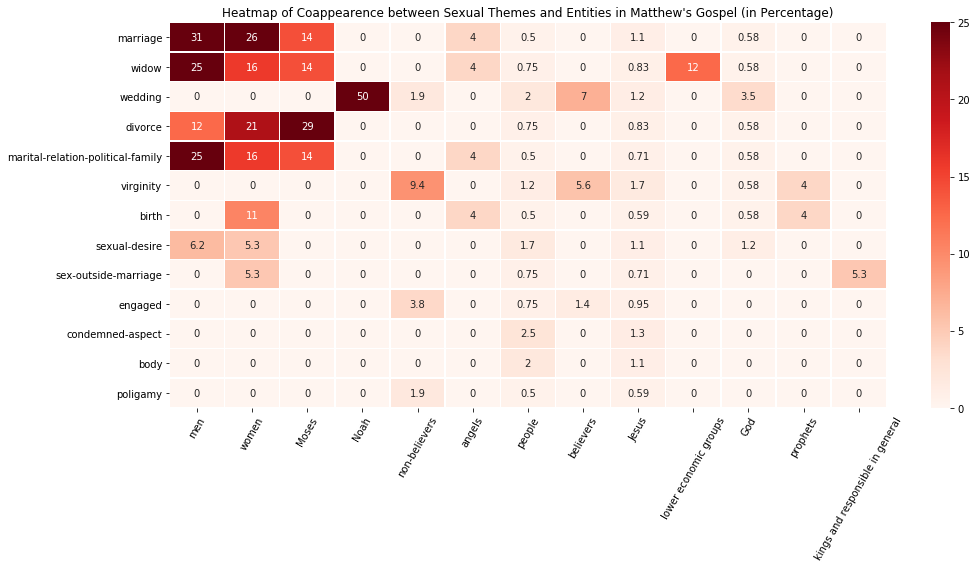

In [139]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.heatmap(coappereance_df.rename(entities_df["NormalizedName-en"].to_dict(), axis="columns").iloc[:,0:13].fillna(0) * 100, vmin=0, vmax =25, cmap="Reds", ax=axes, robust=True, annot=True, linewidths=.5)
axes.title.set_text("Heatmap of Coappearence between Sexual Themes and Entities in Matthew's Gospel (in Percentage)")

for tick in axes.get_xticklabels(): tick.set_rotation(60)
plt.tight_layout()
fig.savefig("./../../../visualizations/features/MAT_coappearence_sexual_themes_entities_en.png")


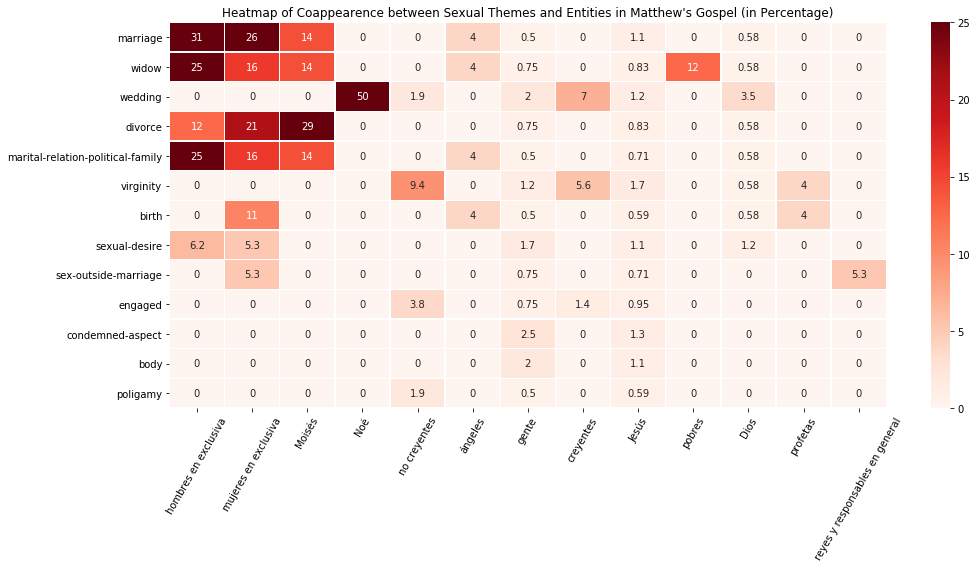

In [141]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.heatmap(coappereance_df.rename(entities_df["NormalizedName-sp"].to_dict(), axis="columns").iloc[:,0:13].fillna(0) * 100, vmin=0, vmax =25, cmap="Reds", ax=axes, robust=True, annot=True, linewidths=.5)
axes.title.set_text("Heatmap of Coappearence between Sexual Themes and Entities in Matthew's Gospel (in Percentage)")

for tick in axes.get_xticklabels(): tick.set_rotation(60)
plt.tight_layout()
fig.savefig("./../../../visualizations/features/MAT_coappearence_sexual_themes_entities_sp.png")
